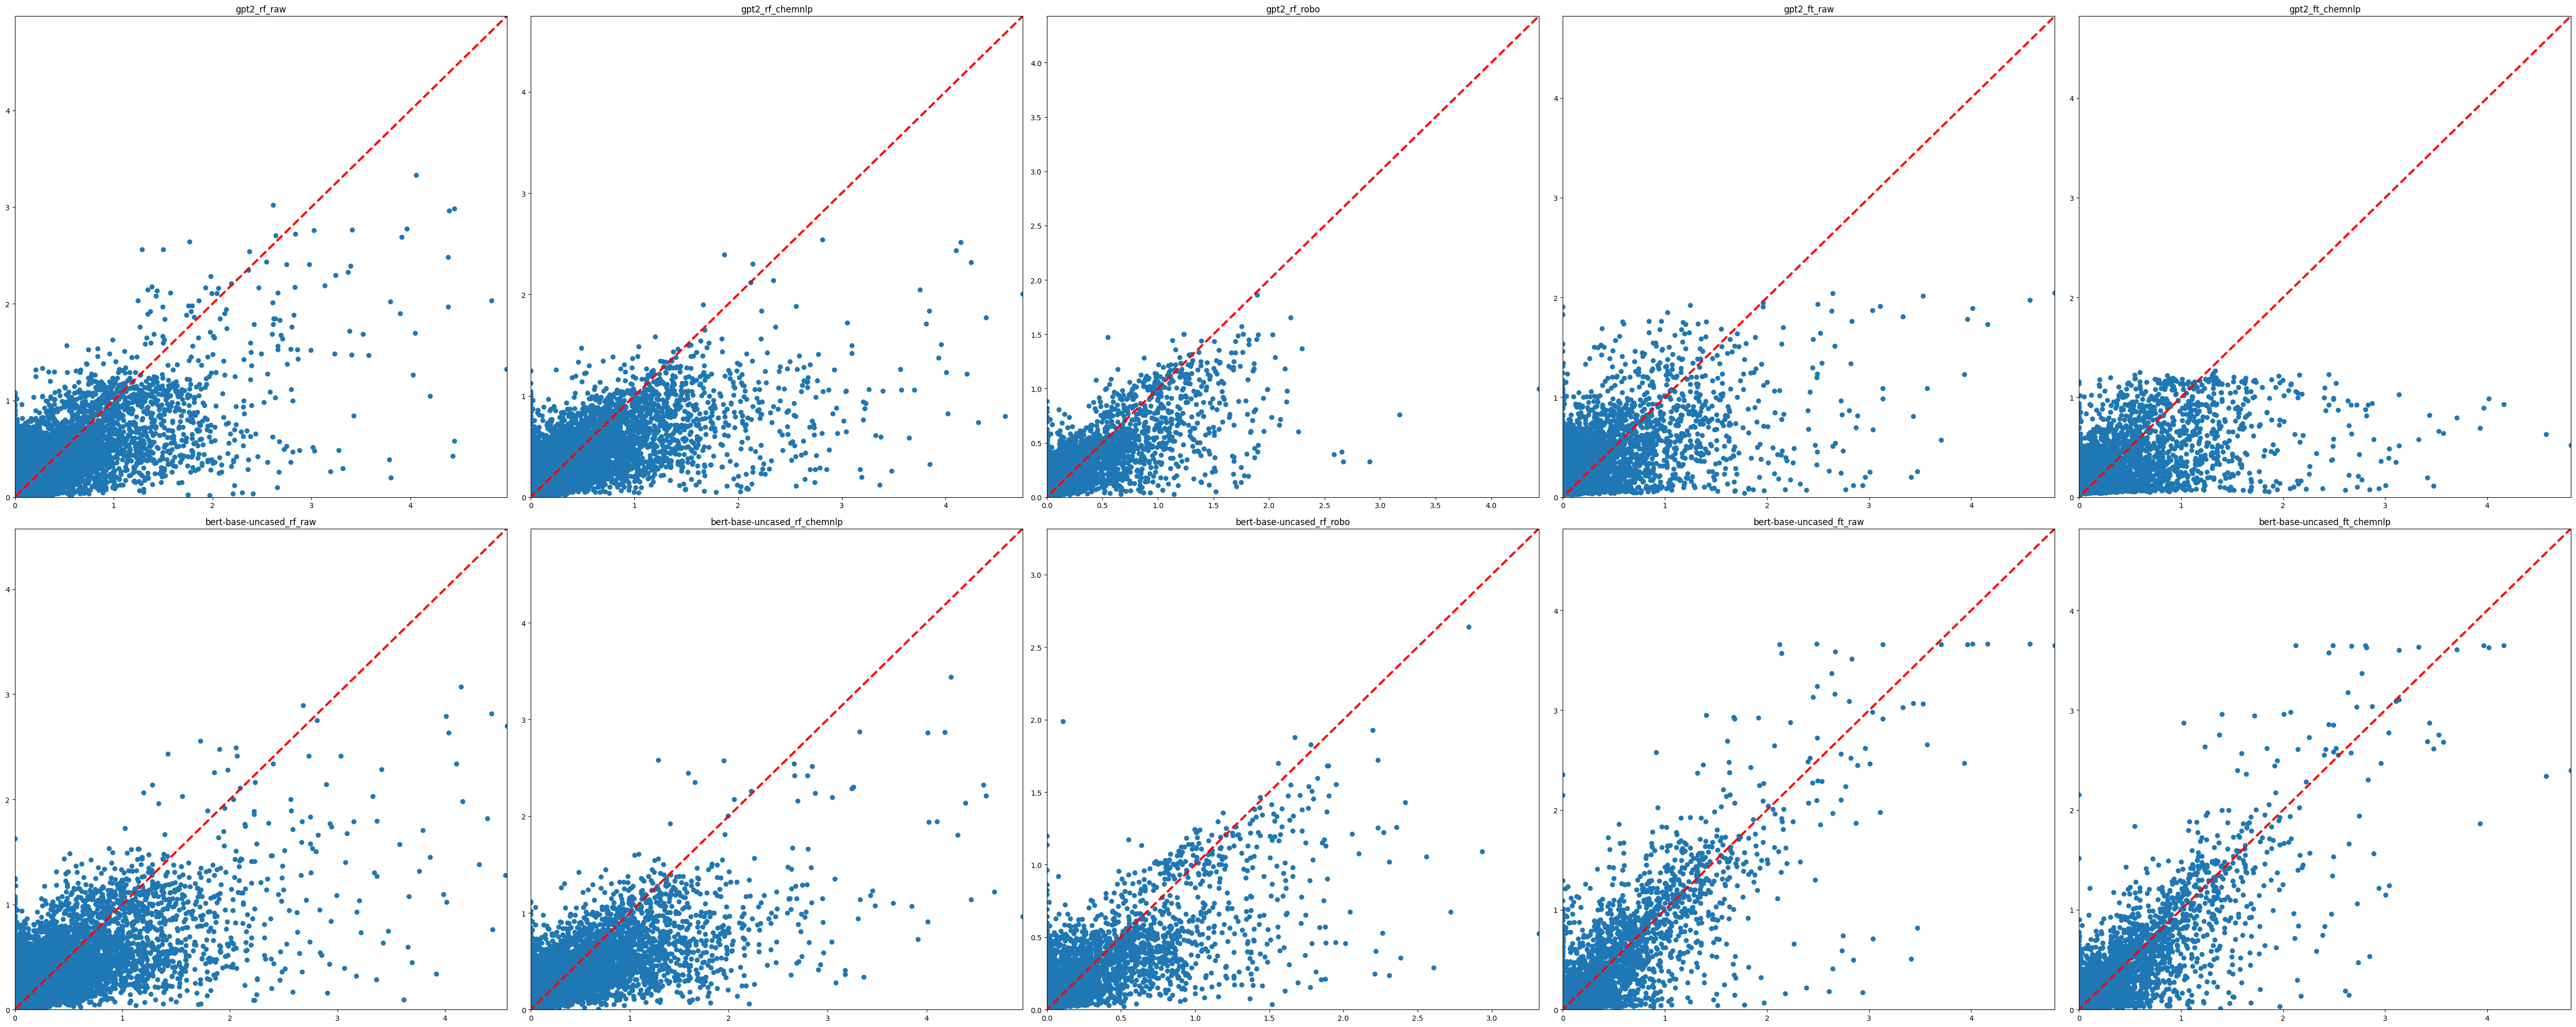

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Create a figure with 4x4 subplots
props = ['ehull','mbj_bandgap', 'slme', 'spillage', 'magmom_outcar','formation_energy_peratom', 'Tc_supercon']
rows = ["gpt2", "bert-base-uncased"]
# columns = ["rf_raw", "rf_chemnlp", "rf_robo", "ft_raw", "ft_chemnlp", "ft_robo"]
columns = ["rf_raw", "rf_chemnlp", "rf_robo", "ft_raw", "ft_chemnlp"]
n_rows = len(rows)
n_cols = len(columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(50, 20))



# Example data for each subplot
prop = props[0]

for i in range(n_rows):
    for j in range(n_cols):
        row = rows[i]
        col = columns[j]
        axes[i, j].set_title(f'{row}_{col}')
        filename = "_".join([col.split("_")[0], row, col.split("_")[1], prop]) + '.csv'
        df = pd.read_csv(os.path.join("pred", filename))
        preds = df["predictions"].values
        labels = df["labels"].values
        axes[i, j].scatter(labels, preds)
        axes[i, j].plot([-100, 100], [-100, 100], '--r', label='y=x', linewidth=3)
        axes[i, j].set_xlim(min(labels), max(labels))
        axes[i, j].set_ylim(min(labels), max(labels))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()
